# Guided Capstone Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
# load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**<font color='teal'> If you need to change your path refer back to step 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [2]:
# specify path, read our wrangled csv file
path = r"C:\Users\Abe\Desktop\Guided_Capstone_Step2\Step 2\data"
os.chdir(path)
df = pd.read_csv('step2_output.csv', index_col=0)
print(df.head())

                  Name   Region    state  summit_elev  vertical_drop  \
0       Alyeska Resort   Alaska   Alaska         3939           2500   
1  Eaglecrest Ski Area   Alaska   Alaska         2600           1540   
2     Hilltop Ski Area   Alaska   Alaska         2090            294   
3     Arizona Snowbowl  Arizona  Arizona        11500           2300   
4  Sunrise Park Resort  Arizona  Arizona        11100           1800   

   base_elev  trams  fastEight  fastSixes  fastQuads  ...  LongestRun_mi  \
0        250      1        0.0          0          2  ...            1.0   
1       1200      0        0.0          0          0  ...            2.0   
2       1796      0        0.0          0          0  ...            1.0   
3       9200      0        0.0          1          0  ...            2.0   
4       9200      0        0.0          0          1  ...            1.2   

   SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0             1610.0           113.0     

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [3]:
# print summary stats table
print(df.describe().transpose())

                   count         mean          std    min      25%  \
summit_elev        330.0  4591.818182  3735.535934  315.0  1403.75   
vertical_drop      330.0  1215.427273   947.864557   60.0   461.25   
base_elev          330.0  3374.000000  3117.121621   70.0   869.00   
trams              330.0     0.172727     0.559946    0.0     0.00   
fastEight          330.0     0.003030     0.055048    0.0     0.00   
fastSixes          330.0     0.184848     0.651685    0.0     0.00   
fastQuads          330.0     1.018182     2.198294    0.0     0.00   
quad               330.0     0.933333     1.312245    0.0     0.00   
triple             330.0     1.500000     1.619130    0.0     0.00   
double             330.0     1.833333     1.815028    0.0     1.00   
surface            330.0     2.621212     2.059636    0.0     1.00   
total_chairs       330.0     8.266667     5.798683    0.0     5.00   
Runs               330.0    48.214724    46.081366    3.0    19.00   
TerrainParks       3

**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

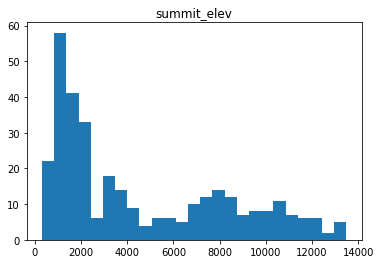

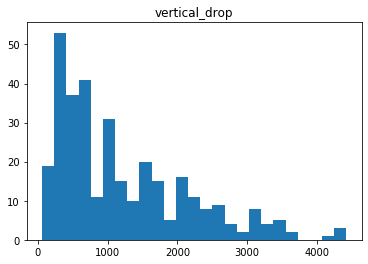

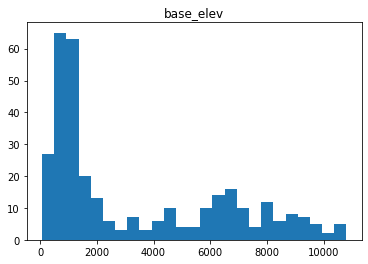

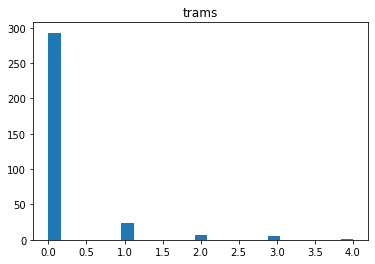

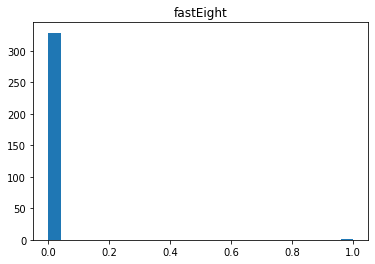

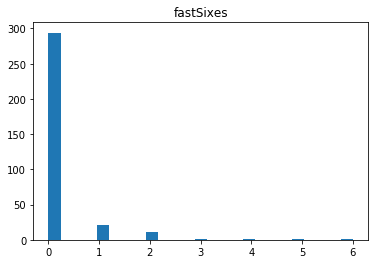

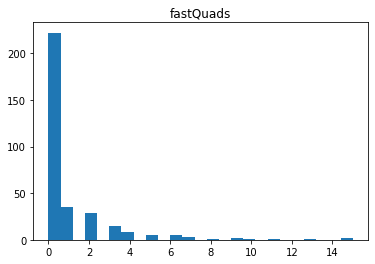

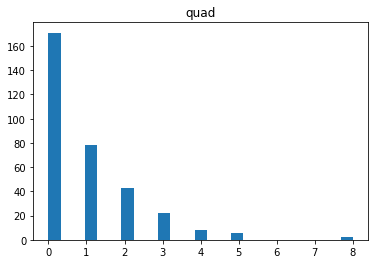

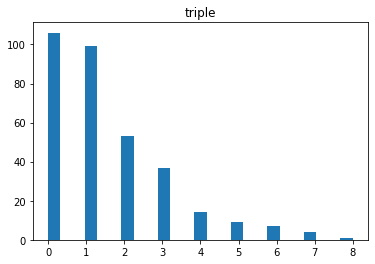

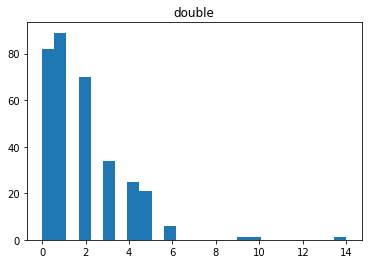

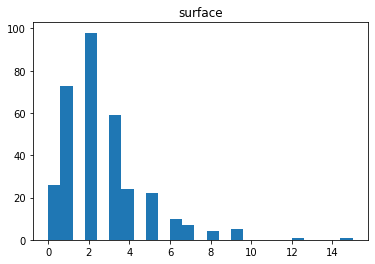

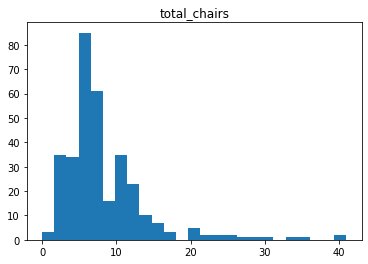

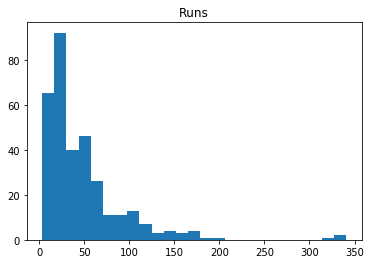

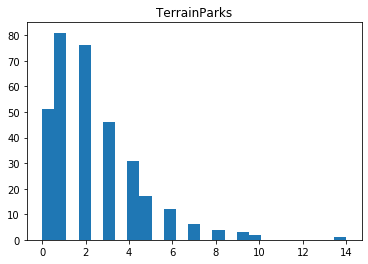

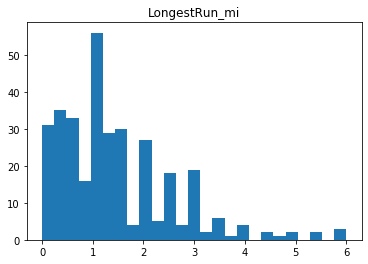

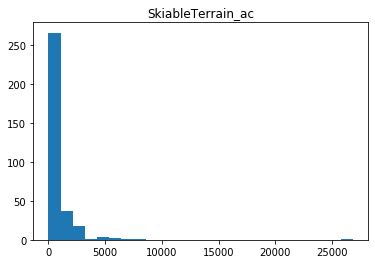

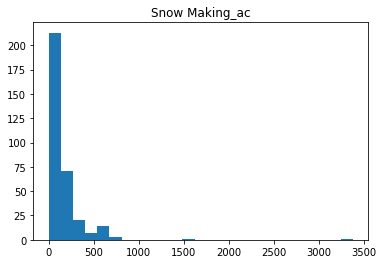

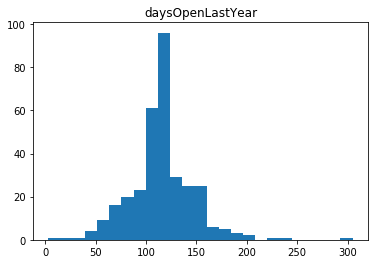

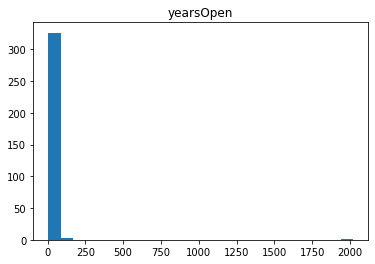

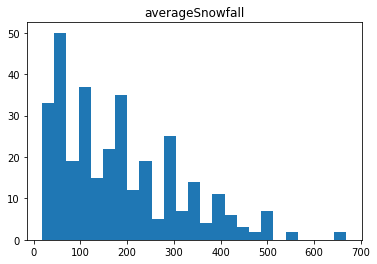

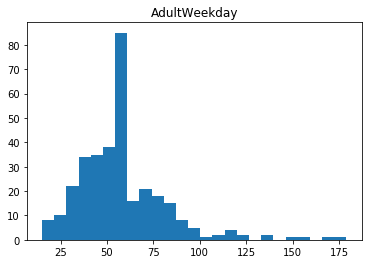

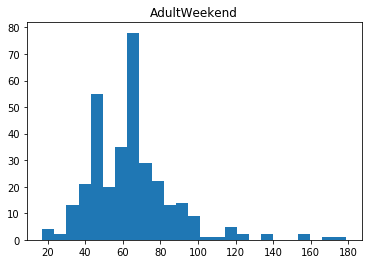

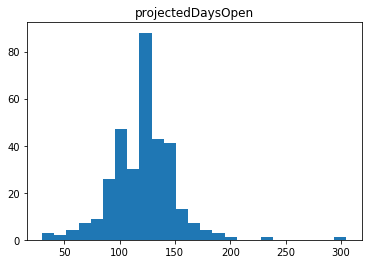

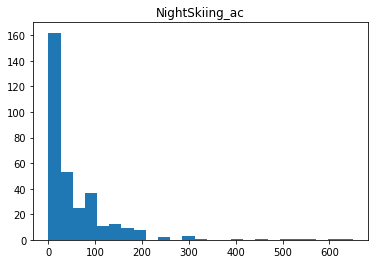

In [4]:
# plot histograms for all numeric columns
non_numeric = ['Name', 'Region', 'state']
for column in df.columns:
    if column not in non_numeric:
        plt.hist(df[column], bins=25)
        plt.title(column)
        plt.show()

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

Features that appear to be duplicates or highly correlated features include:

Base Elevation, Summit Elevation, Vertical Drop

Projected Days Open, Days Open Last Year

Snowmaking Acerage, Skiable Terrain Acerage

The transportation columns (fastEight, fastSixes, fastQuads, quad, triple, double, total_chairs) have very similar distributions.

We also appear to have an outlier in our yearsOpen (probably a typo where someone entered the current year) that we should fix.

**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

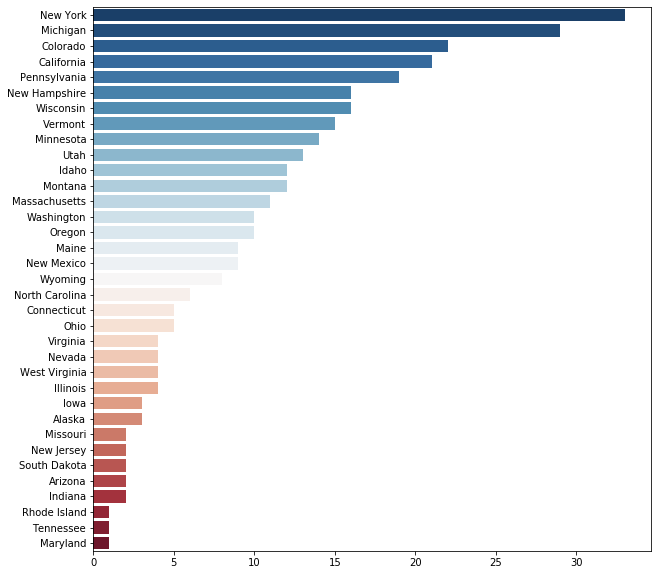

In [5]:
# plot distribution among states
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.state.value_counts())
names = list(x.index)
values = list(x.state)
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='teal'>Region Levels Plot</font>**

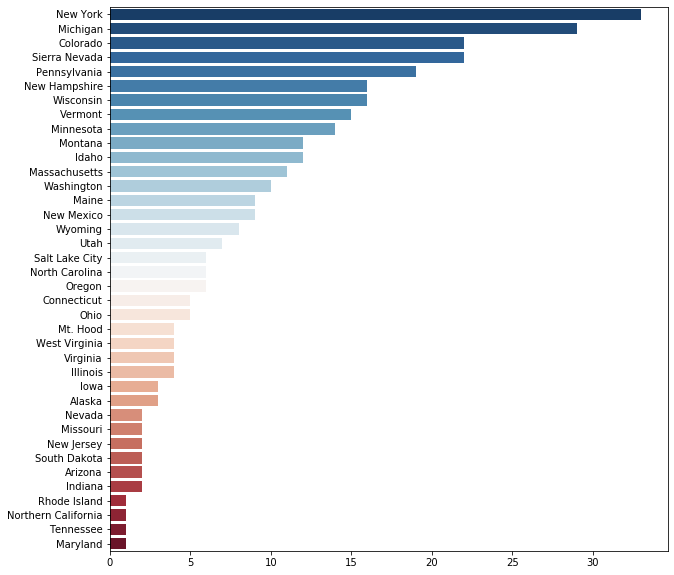

In [6]:
# plot distribution among regions
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.Region.value_counts())
names = list(x.index)
values = list(x.Region)
sns.barplot(x=values, y=names, palette="RdBu_r")

By reviewing the State and Regions counts plots you should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [7]:
# remove redundant Region column
df.drop(columns='Region', inplace=True)

## Anomolies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

Hint: you'll see the methodology here in this article on Exploratory Data Analysis [here](nce-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

<function matplotlib.pyplot.show(*args, **kw)>

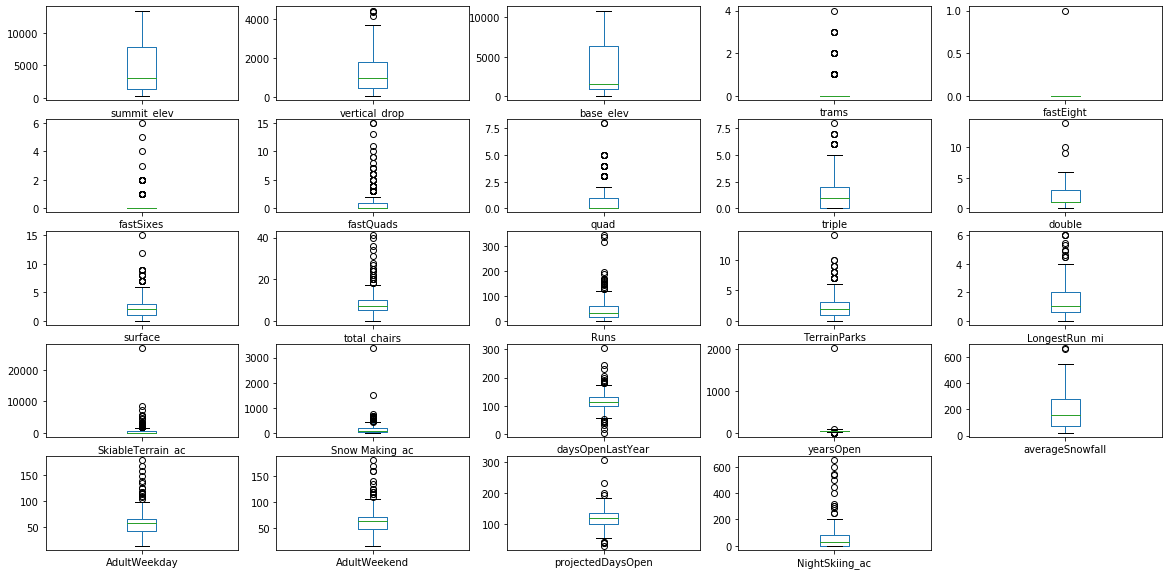

In [8]:
# plot boxplots for all columns
df.plot.box(figsize=(20,10), subplots=True, layout=(5,5))
plt.show

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed</font>

Hint: Recall from your statistics prework that a common definition of an outlier is an observation lying more than (1.5 * the Interquartile range) above the third quartile, or more than just that much below the first quartile.

In [9]:
# get IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [10]:
# filters our existing dataframe, picking out just those observations that are NOT outliers  
dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

<function matplotlib.pyplot.show(*args, **kw)>

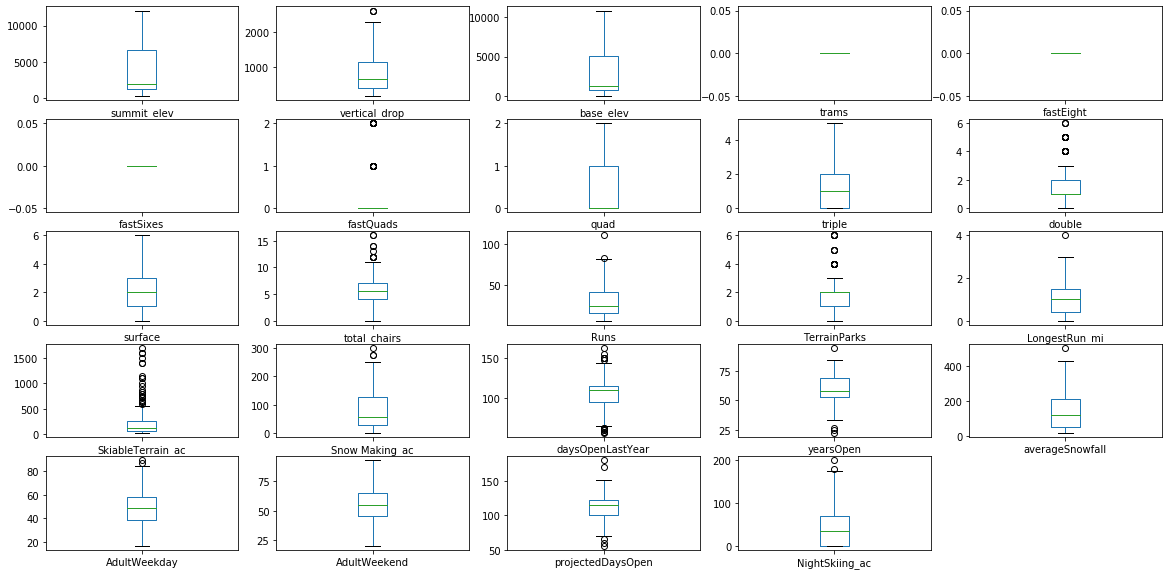

In [11]:
# make a boxplot of this new dataframe dfno
dfno.plot.box(figsize=(20,10), subplots=True, layout=(5,5))
plt.show

In [12]:
# Print the shapes of our dataframes df and dfno to compare the number of observations in each
print(df.shape)
print(dfno.shape)

(330, 26)
(176, 26)


There are many ways to discover and remove outliers, and what counts as a sensible way of doing so depends on your problem, your methodology for solving that problem, and the nature of your data. 

Each method will have its merits and demerits. As we can see, in this instance, we've lost a great many observations! 

There is no hard and fast rule as to which outlier removal method is best in all cases, and you will have to exercise your good judgement in arriving at an appropriate method for your problem at hand. We will cover outlier removal in more depth in units 7 (Data Wrangling) and 10 (Statistics for Exploratory Data Analysis) of the course. 

There are many possible response variables you could have identified in Step 1 of this guided capstone. However, for the rest of this guided capstone project, we will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, we need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, we want to predict the number of days the resort will be open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

(array([ 7., 15., 19., 36., 27., 39.,  5., 10., 12.,  6.]),
 array([17. , 24.2, 31.4, 38.6, 45.8, 53. , 60.2, 67.4, 74.6, 81.8, 89. ]),
 <a list of 10 Patch objects>)

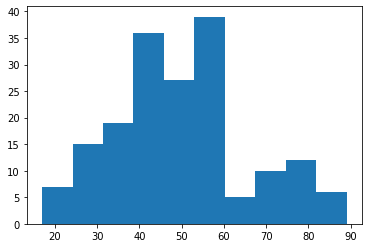

In [13]:
# Make a histogram of the 'AdultWeekday' column of the dfno dataframe
plt.hist(dfno['AdultWeekday'])

(array([ 1.,  6., 18., 50., 16., 16., 38., 12., 11.,  8.]),
 array([20. , 27.3, 34.6, 41.9, 49.2, 56.5, 63.8, 71.1, 78.4, 85.7, 93. ]),
 <a list of 10 Patch objects>)

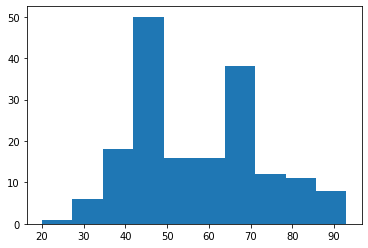

In [14]:
# histogram of the AdultWeekend column of the dfno dataframe
plt.hist(dfno['AdultWeekend'])

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

(array([10., 13., 12., 14., 35., 61., 12.,  9.,  8.,  2.]),
 array([ 56. ,  66.7,  77.4,  88.1,  98.8, 109.5, 120.2, 130.9, 141.6,
        152.3, 163. ]),
 <a list of 10 Patch objects>)

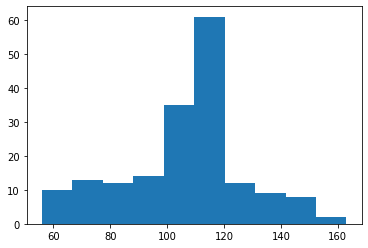

In [15]:
# histogram of the daysOpenLastYear column of the dfno dataframe
plt.hist(dfno['daysOpenLastYear'])

(array([ 3., 11., 19., 36., 23., 57., 12., 13.,  0.,  2.]),
 array([ 56. ,  68.4,  80.8,  93.2, 105.6, 118. , 130.4, 142.8, 155.2,
        167.6, 180. ]),
 <a list of 10 Patch objects>)

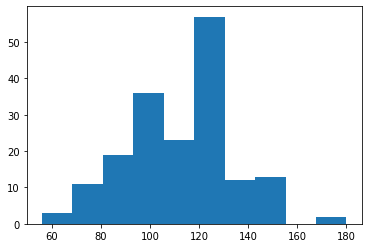

In [16]:
# histogram of the projecteDaysOpen column of the dfno dataframe
plt.hist(dfno['projectedDaysOpen'])

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

# Explore data relationships

<font color='teal'>**Create pairplots or what is commonly referred to as biplots**</font>

Hint: pairplots are covered in this article on EDA [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

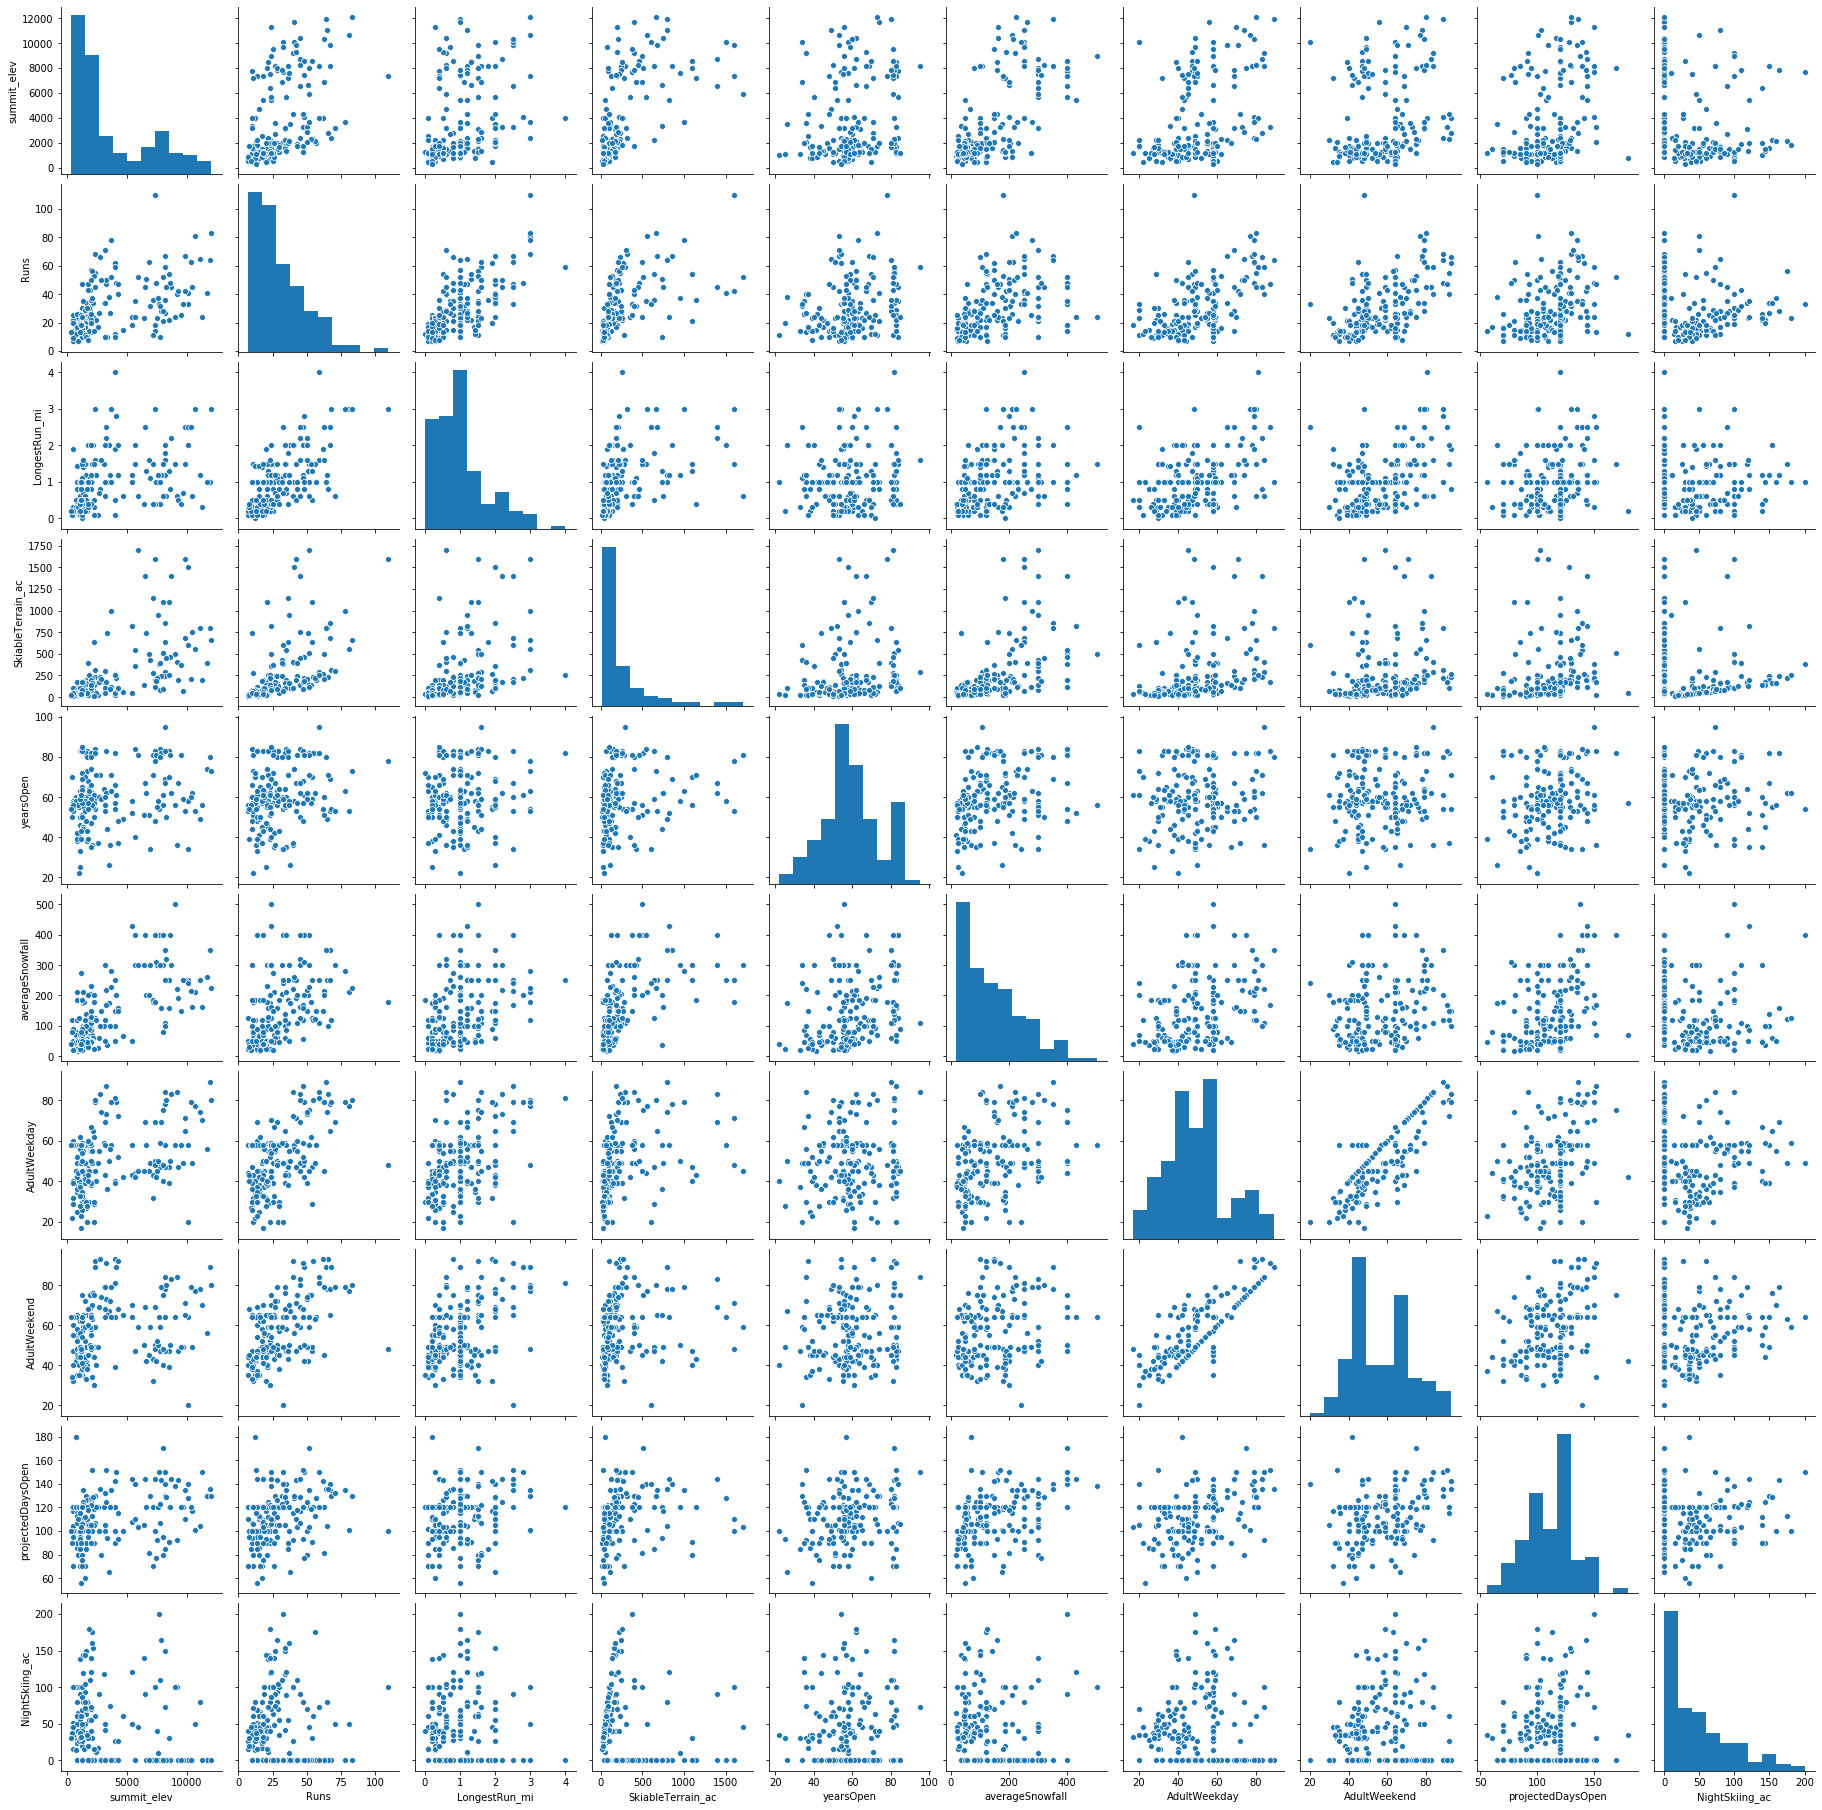

In [17]:
#create pairplots for select variables
vars_list = ['summit_elev', 'Runs', 'LongestRun_mi', 'SkiableTerrain_ac', 'yearsOpen', 'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac']
g = sns.pairplot(dfno[vars_list])

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

In [18]:
#Calculate the correlation coefficients
corr = dfno.drop(['trams', 'fastEight', 'fastSixes'], axis=1).corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,summit_elev,vertical_drop,base_elev,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
summit_elev,1.000000,0.620000,0.990000,0.150000,-0.050000,0.060000,0.090000,-0.380000,-0.100000,0.500000,0.040000,0.370000,0.620000,-0.060000,0.290000,0.210000,0.680000,0.410000,0.250000,0.290000,-0.240000
vertical_drop,0.620000,1.000000,0.490000,0.400000,-0.050000,0.080000,0.230000,-0.340000,0.060000,0.740000,0.120000,0.630000,0.670000,0.220000,0.260000,0.260000,0.570000,0.580000,0.530000,0.310000,-0.180000
base_elev,0.990000,0.490000,1.000000,0.080000,-0.050000,0.050000,0.060000,-0.350000,-0.120000,0.410000,0.020000,0.290000,0.560000,-0.120000,0.270000,0.180000,0.640000,0.340000,0.170000,0.250000,-0.230000
fastQuads,0.150000,0.400000,0.080000,1.000000,0.140000,0.180000,0.140000,0.060000,0.430000,0.370000,0.270000,0.380000,0.190000,0.440000,0.220000,0.020000,0.080000,0.460000,0.470000,0.240000,0.140000
quad,-0.050000,-0.050000,-0.050000,0.140000,1.000000,0.160000,-0.170000,0.190000,0.360000,0.070000,0.120000,-0.030000,-0.080000,0.220000,0.140000,-0.080000,-0.200000,0.150000,0.230000,0.100000,0.160000
triple,0.060000,0.080000,0.050000,0.180000,0.160000,1.000000,-0.120000,0.110000,0.520000,0.130000,0.320000,0.110000,-0.030000,0.320000,0.060000,-0.030000,-0.010000,0.240000,0.310000,0.090000,0.280000
double,0.090000,0.230000,0.060000,0.140000,-0.170000,-0.120000,1.000000,-0.020000,0.470000,0.340000,0.320000,0.210000,0.280000,0.220000,0.060000,0.220000,0.150000,0.210000,0.220000,0.140000,0.110000
surface,-0.380000,-0.340000,-0.350000,0.060000,0.190000,0.110000,-0.020000,1.000000,0.620000,-0.210000,0.220000,-0.180000,-0.260000,0.040000,-0.010000,-0.100000,-0.350000,-0.140000,-0.100000,-0.040000,0.190000
total_chairs,-0.100000,0.060000,-0.120000,0.430000,0.360000,0.520000,0.470000,0.620000,1.000000,0.230000,0.520000,0.140000,0.020000,0.440000,0.140000,0.040000,-0.140000,0.290000,0.370000,0.170000,0.350000
Runs,0.500000,0.740000,0.410000,0.370000,0.070000,0.130000,0.340000,-0.210000,0.230000,1.000000,0.350000,0.660000,0.570000,0.440000,0.250000,0.270000,0.450000,0.580000,0.550000,0.300000,-0.110000


When reviewing the Pearson correlation coefficient heatmap, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

Step 1: Create a correlation matrix that excludes your response variables. 

Step 2: Select the upper triangle of the correlation matrix. This is because a correlation matrix actually contains the same information, twice over!

Step 3: Find the index of feature columns with a correlation greater than 0.95.

In [19]:
# Step 1. Call the variable corr_matrix
corr_matrix = dfno.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [20]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['base_elev']


In [21]:
print('Reduced dataframe size: ',dfno.drop(dfno[to_drop], axis=1).shape)

Reduced dataframe size:  (176, 25)


In [ ]:
# Now replace dfno by the result of dropping the columns in the to_drop variable from it
dfno.drop(to_drop, axis=1, inplace=True)

Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in our model development dataset.

Clustering essentially finds patterns in data when we don't know in advance what we're looking for. The K-means algorithm is one way of doing clustering. It puts our data into groups (or 'clusters') which can then become features for further analysis. What the k-means algorithm outputs, though, depends on the number of clusters we set out to have. We will use a method called 'Elbow plotting' to determine this number. 

We will cover clustering and k-means thoroughly in the Unsupervised Learning unit of this course, but for now, we'll use it for feature creation alone, which is an integral part of Exploratory Data Analysis. Don't worry if you don't understand the details just yet. 

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps us determine the number of clusters to include in our k-means clustering implementation. 

In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [28]:
from sklearn.cluster import KMeans
x = dfno.drop(['Name','state'], axis =1).values

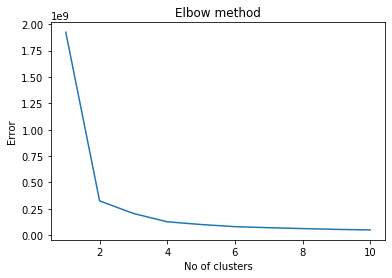

In [29]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

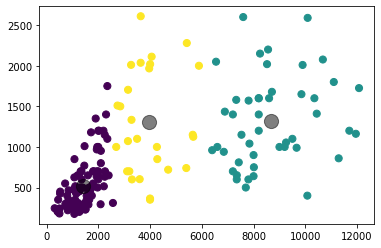

In [30]:
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [ ]:
# Make a new column in your dfno dataframe called 'clusters', and assign it the variable: y_kmeans3
dfno['clusters'] = y_kmeans3

In [33]:
# Write dataframe to csv
dfno.to_csv('step3_output.csv')